# Weather Trends

## Background

In this report, I will analyze the local temperature trends of some cities and compare with the global temperature trend. The cities analyzed were:
- Guarulhos (Brazil), the nearest city from where I live.
- All the other cities from Brazil on the Data Source.
- 4 other cities around the world.

My intention in analyze the other cities is to compare with Guarulhos and check for similarities.

The tool used was Python, and the libraries were Pandas, for the data analyze, and Matplotlib and Seaborn to the visualization part.

For the moving average metric, I got the average of 7 years period.

My considerations to show the following trends in two different charts, one with local data and other with global data, was because some cities are higher average temperatures than the global average, making the chart's aesthetic bad and confusing when visualization the information.

## Extract the data

In order to plot the same global chart for every city analyzed, I used similar queries to get the data changing only the filter condition.

First I extract the data about Brazil in a csv file. And then, I get the data from the other cities of different countries in other csv file.

The queries used were:
- Brazil Data:
```
    SELECT 
        cd.*, 
        gd.avg_temp as gbl_avg_temp 
    FROM city_data cd 
        LEFT JOIN global_data gd ON cd.year = gd.year 
    WHERE cd.country = 'Brazil';
```


- Countries Data:
```
    SELECT 
        cd.*, 
        gd.avg_temp as gbl_avg_temp
    FROM city_data cd
        LEFT JOIN global_data gd ON cd.year = gd.year
    WHERE cd.city || ' - ' || cd.country IN (
        'London - United Kingdom', 
        'New York - United States', 
        'Antananarivo - Madagascar', 
        'Tokyo - Japan'
    );
```

## Analyzes

In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def fill_blank_avg(df):
    """
    Fill the null values of some DataFrame with the avg_temp average.
    
    If there is not the avg_temp field will raise an Error.
    
    Parameters
    ----------
    df : DataFrame
        The DataFrame that will be filled with the avg_temp average
    """
    
    avg = df.avg_temp.mean()
    df.avg_temp.fillna(avg, inplace=True)
    return df

In [3]:
def plot_info(df, city_name, country_name):
    """
    Fill the null values of the DataFrame, 
    filter the data to get only the years after 1850 
    create the local and global moving average and plot the data. 
    
    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains the information to plot
    city_name : string
        The city name related to the data that will be plotted
    country_name : string
        The country name related to the data that will be plotted
    """
    
    
    
    df = fill_blank_avg(df)
    df['7y_ma'] = df.avg_temp.rolling(window=7).mean()
    df['7y_gma'] = df.gbl_avg_temp.rolling(window=7).mean()
    
    df = df[df.year > 1850]
    
    
    fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )
    sns.lineplot(x='year', y='7y_ma', data=df, ax=axs[0])
    sns.lineplot(x='year', y='7y_gma', data=df, ax=axs[1])
        
    plt.suptitle(f"{city_name} ({country_name}) Moving Average Temperature (ºC) Across the Years", 
                 horizontalalignment='center', verticalalignment='center', 
                 fontweight='bold', fontsize='14')
    
    axs[0].set(ylabel='Moving Avg Temp (ºC)', xlabel='Year', title=city_name)
    axs[1].set(ylabel='Moving Avg Temp (ºC)', xlabel='Year', title='Global')
    plt.show()

In [4]:
# Reading the data about Brazil

brl = pd.read_csv('brazil_data.csv')

### Guarulhos Information

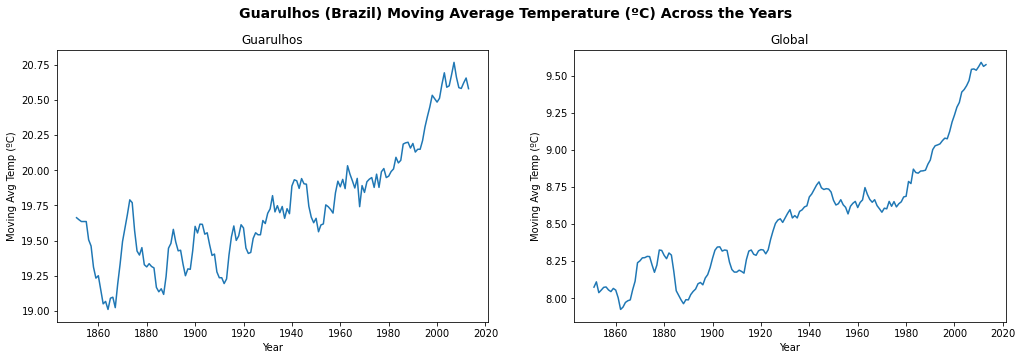

In [5]:
# From Brazil data, get Guarulhos data
# and then plot the moving average temperature.

guarulhos = brl[brl.city == 'Guarulhos'].copy()
plot_info(guarulhos, guarulhos.city.iat[0], guarulhos.country.iat[0])

The first obvious observation it's that both temperature are increasing and in a similar rhythm, since the global temperature increased something about 1.5ºC and the local increasment was about 1.75ºC. Also it's possible to see that Guarulhos it's way hotter then the globe consistenly, but that make sense, since Guarulhos it's on Brazil and Brazil it is a tropical country, so a natural hotter country.

Another observable point it is that although both temperature are increasing in similar rhythm, the global average goes with less oscilatian then Guarulhos and with less noises. And as my last point, it looks like that since the 70's and 80's, there was an boom on the inscreasment and the local and global increase was almost the same excluding the oscillation and noises.

### Other Brazil's Cities Information

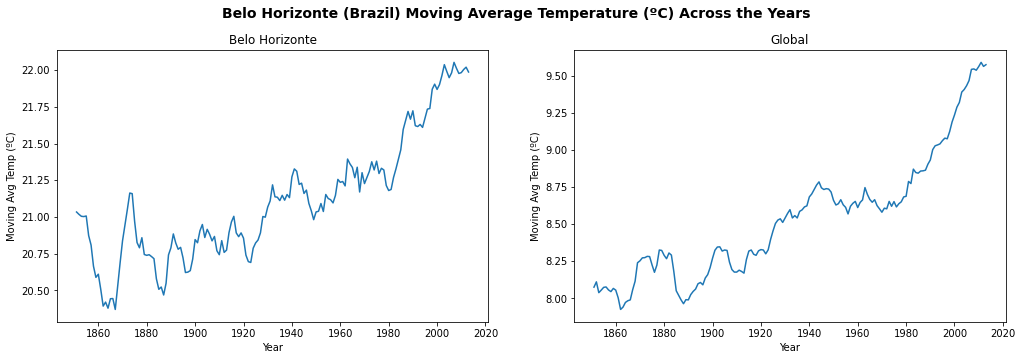

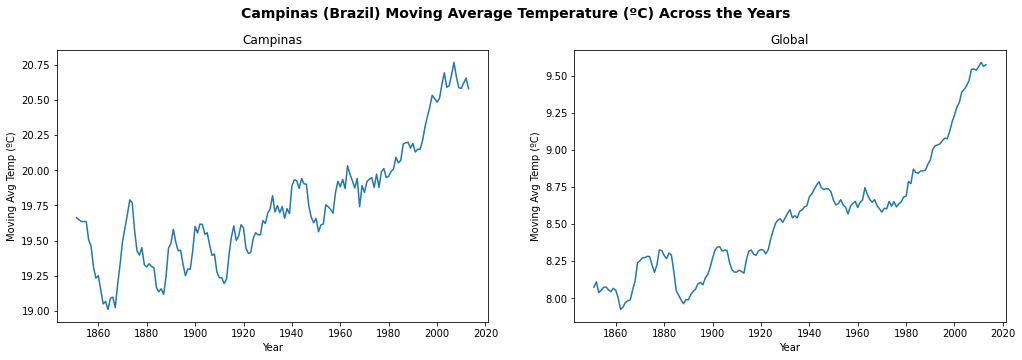

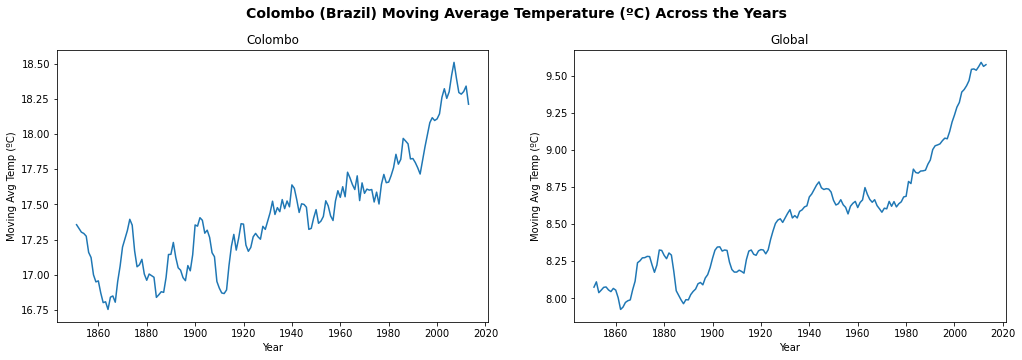

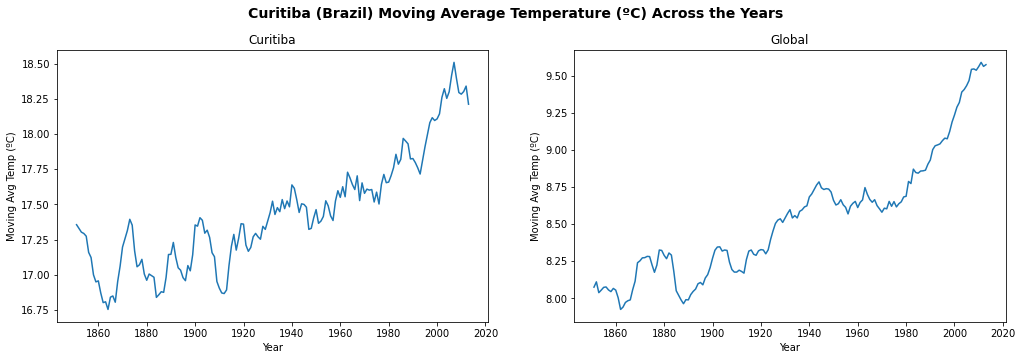

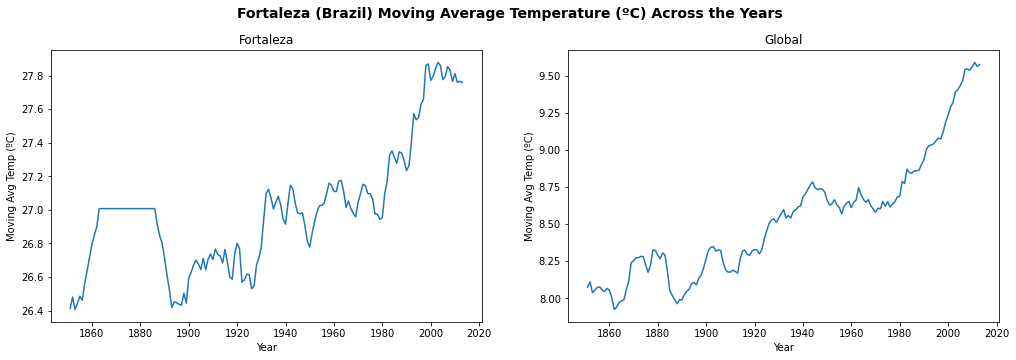

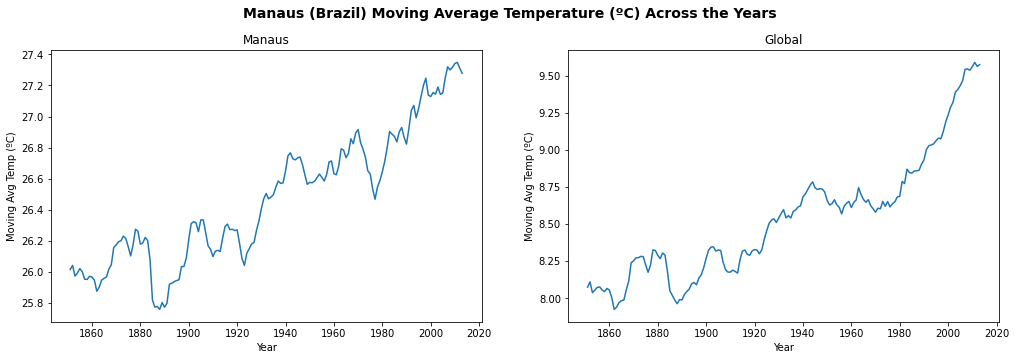

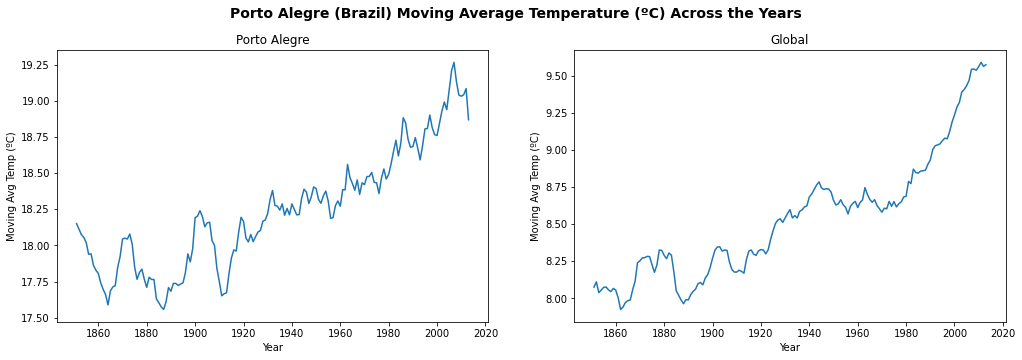

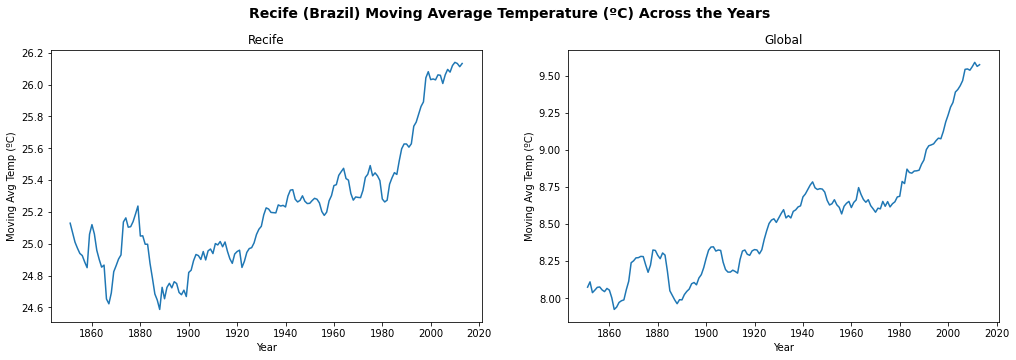

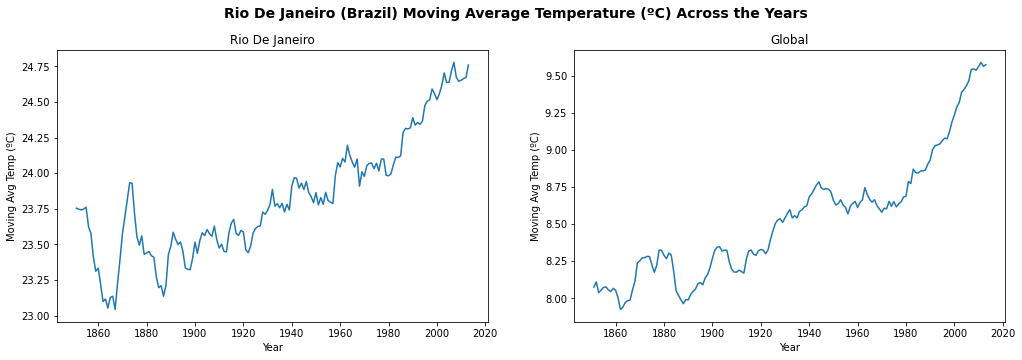

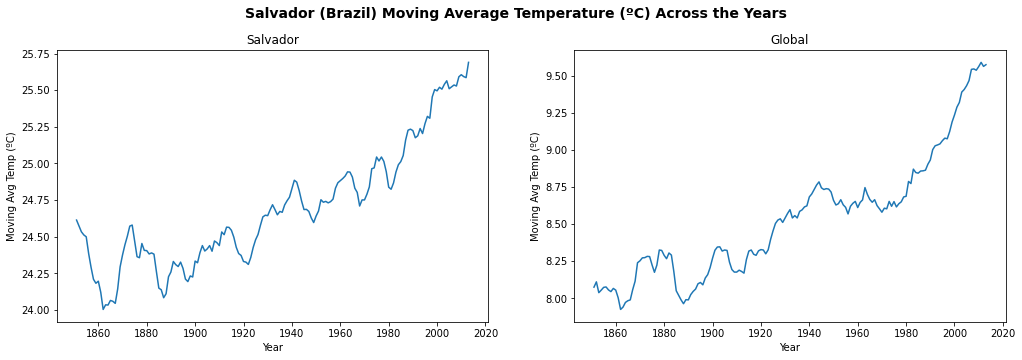

In [6]:
# Info throughout Brazil except Guarulhos
for city_name in brl[brl.city != 'Guarulhos'].city.unique():
    city = brl[brl.city == city_name].copy()
    country_name = city.country.iat[0]
    plot_info(city, city_name, country_name)
    print('\n')

At first look, although the weather and regian peculiarities, there's a common agreement that all above cities are increasing the temperature and following the global trend. And as Guarulhos, all of them have natural high temperatures, since all of them are in Brazil.

But trying to group some cities, we can notice that Curitiba and Colombo charts are very similar. This is because both are in the same regian and district, so both have the same variaty of weather. Campinas get almost the same trend line of Guarulhos, and make sense, since both are in São Paulo's district and they are two neighbor cities.

### Cities Across the World Information

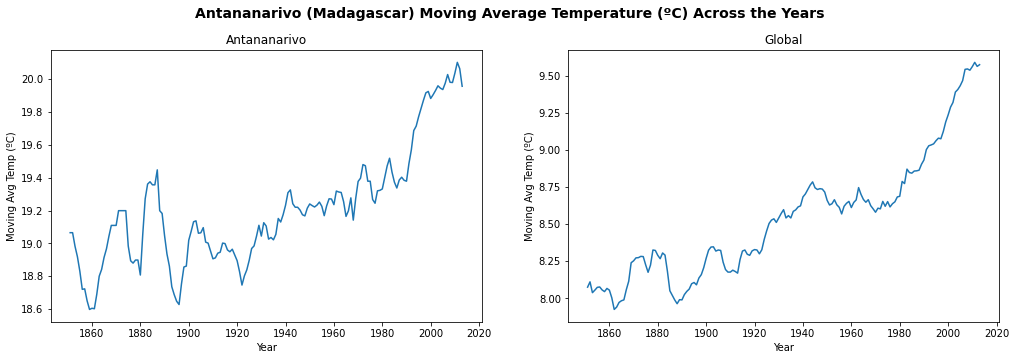

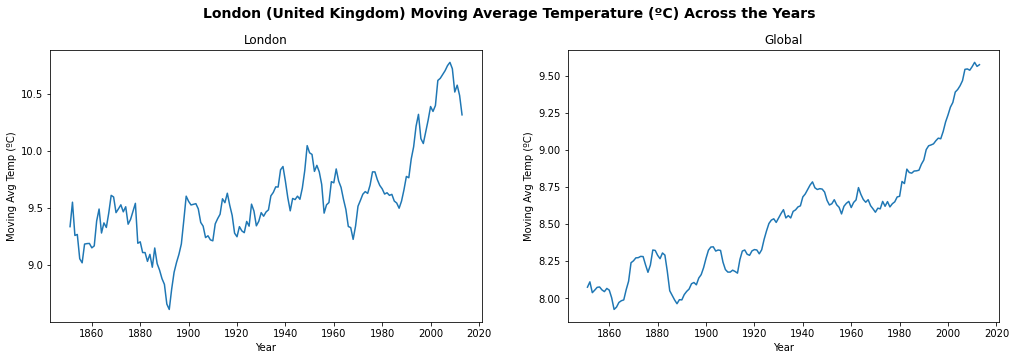

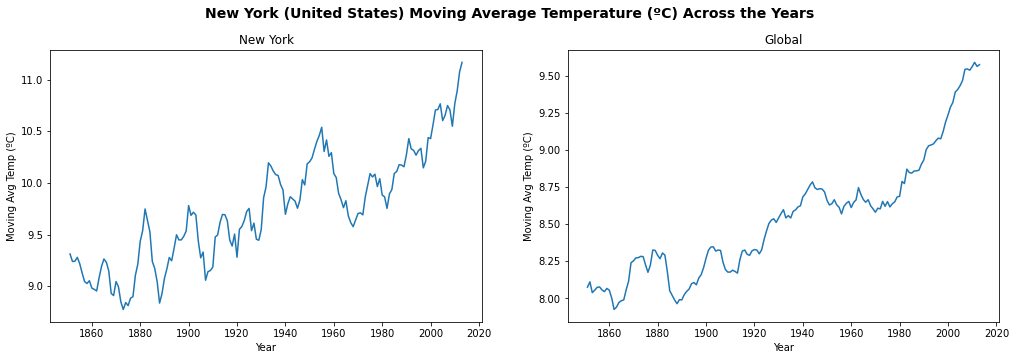

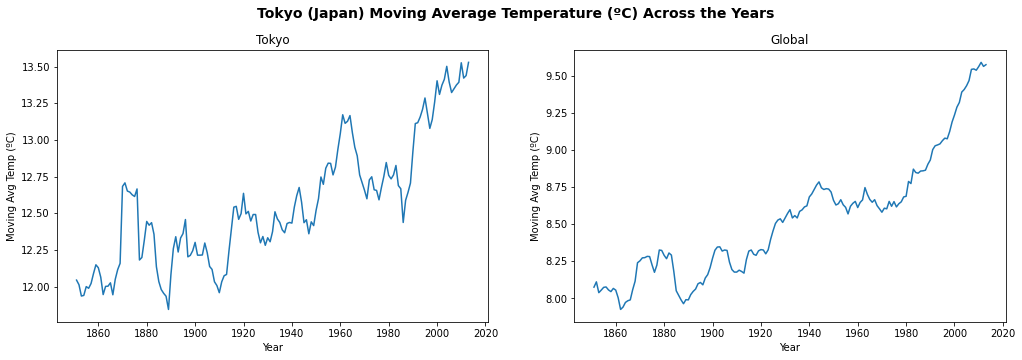

In [7]:
countries = pd.read_csv('countries_data.csv')
for city_name in countries.city.unique():
    city = countries[countries.city == city_name].copy()
    country_name = city.country.iat[0]
    plot_info(city, city_name, country_name)
    print('\n')

Finaly analyzing some cities across the world, it's possible to afirm that probably all the cities average temperature are increasing and all of them are following the global trend and rhythm.

There is some regian pecularities, as like Antananarivo, that is on Madascar, an African country, so a hotter place as Brazil cities.

Also it's interesting to notice that on London there is a long period, although all the oscilatians, that the moving average follow a neutral trend. That also happened on Tokyo, but in shorter periods and more frequency.

To complete, like Guarulhos, look like all the cities analyzed here, after the 80's got a boom on the average increament. That could be something ocasioneted by the globalization that ocurred on Cold War, but is necessary more data to afirm anything conclusive. 